In [1]:
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

In [77]:
#load gps coordinates
## testing with data_gps.
data_gps = pd.read_csv('../data/data_gps.csv')
data_gps['code_INSEE'] = ['0'+str(X) if len(str(X)) < 5 else X for X in data_gps['code_INSEE']]
data_gps.columns = ['CODE_INSEE','latitude','longitude']


In [54]:
def plot_gps_column(data,column,xlim=(-6.5, 10.5), ylim=(41.5, 51.5)):
    #data = pd.merge(dataframe_total,data_gps,on='CODE_INSEE')
    fig, ax = plt.subplots(figsize = (10,8))
    index = data[column].isna()
    if index.sum():
        ax.scatter(data.longitude[index], data.latitude[index], c='k', s=20)
        sc = ax.scatter(data.longitude[-index], data.latitude[-index], c=data[column][-index], s=20,cmap='Spectral')
    else:
        sc = ax.scatter(data.longitude, data.latitude, c=data[column], s=20,cmap='Spectral')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')
    ax.set_title("Column : {}, NaNs({})".format(column,index.sum()))
    fig.colorbar(sc)
    


# 1. Analyse du mergev2

In [78]:
mergev2 = pd.read_csv('../data/processed/data_merge_V2_FIX.csv')
mergev2_gps = pd.merge(mergev2,data_gps,on="CODE_INSEE")
mergev2_gps.loc[0,:]

Unnamed: 0                                    0
CODE_INSEE                                01001
DEP                                          01
LIBCOM                  L'Abergement-Clémenciat
TX_NSCOL15P                             52.1543
TX_MENSEUL                              22.8236
TX_FAMMONO                               4.8315
TX_65ETPLUS                             23.7792
TX_25ETMOINS                            11.3093
COUVERTURE_HD_THD                             1
TX_BENEF_MINIMAS_SOC                          1
TX_DEMANDEUR_EMPLOIS                      18.91
TX_POVERTY                              19.4795
latitude                                46.1534
longitude                               4.92611
Name: 0, dtype: object

-------
Les variables TX_BENEF_MINIMAS_SOC et COUVERTURE_HD_THD ont seulement la valeur d'1

In [79]:
mergev2_gps.TX_BENEF_MINIMAS_SOC.unique()

array([1])

In [80]:
mergev2_gps.COUVERTURE_HD_THD.unique()

array([1.])

In [81]:
mergev2_gps.describe()

,Unnamed: 0,TX_NSCOL15P,TX_MENSEUL,TX_FAMMONO,TX_65ETPLUS,TX_25ETMOINS,COUVERTURE_HD_THD,TX_BENEF_MINIMAS_SOC,TX_DEMANDEUR_EMPLOIS,TX_POVERTY,latitude,longitude
count,37929.000000,37929.000000,37922.000000,37922.000000,37929.000000,37929.000000,37929.0,37929.0,37929.000000,37929.000000,37927.000000,37927.000000
mean,17498.698305,54.129278,29.137260,7.489215,26.258565,11.002355,1.0,1.0,22.995535,26.067695,46.720203,2.766033
std,10102.045395,9.559423,8.871942,5.607282,7.876709,3.400661,0.0,0.0,4.609269,6.029521,4.290832,4.864469
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,6.894494,9.387755,-21.340107,-61.779579
25%,8754.000000,48.158845,23.076923,4.100995,20.768137,9.016393,1.0,1.0,19.784857,21.253129,45.101190,0.732289
50%,17592.000000,54.614273,28.352411,7.248383,25.245867,11.062867,1.0,1.0,22.758716,26.006932,47.375705,2.729303
75%,26274.000000,60.831510,34.217648,10.125913,30.882860,12.911392,1.0,1.0,25.596068,30.690537,48.820234,4.997997
max,34992.000000,100.000000,100.000000,100.000000,100.000000,52.142112,1.0,1.0,54.744097,70.796460,51.073044,55.754522


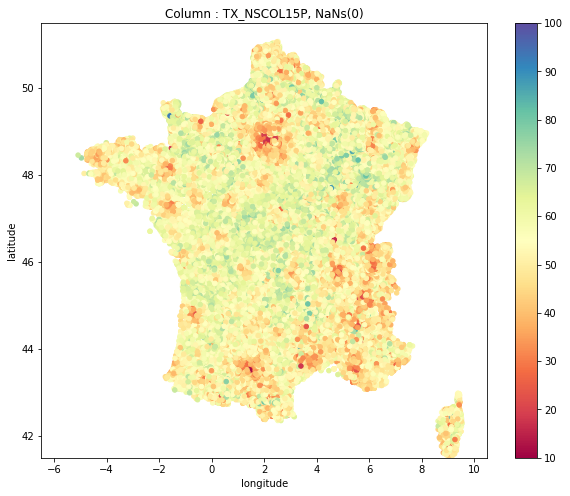

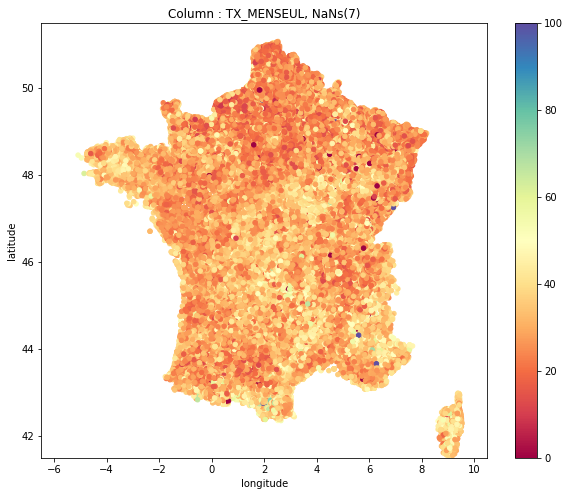

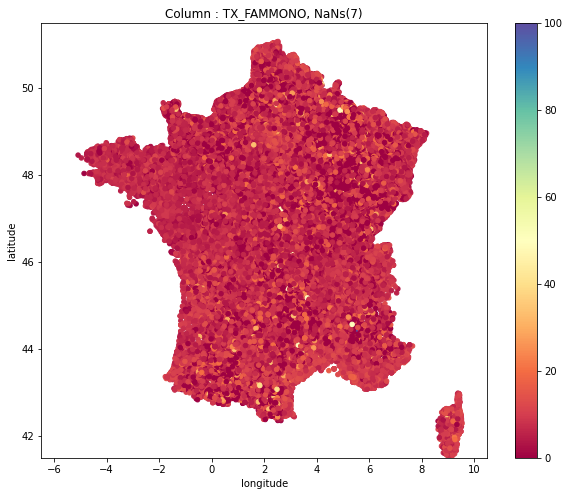

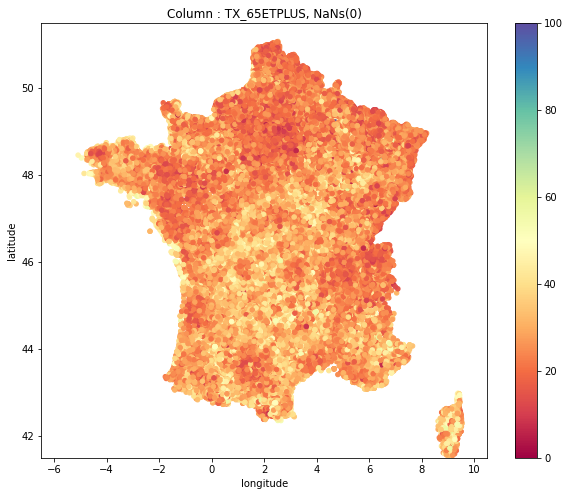

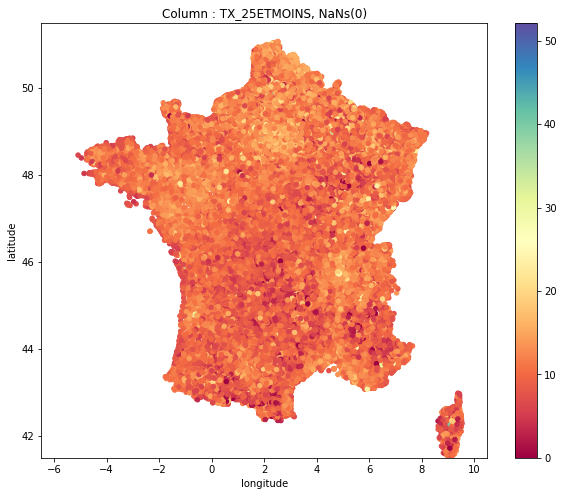

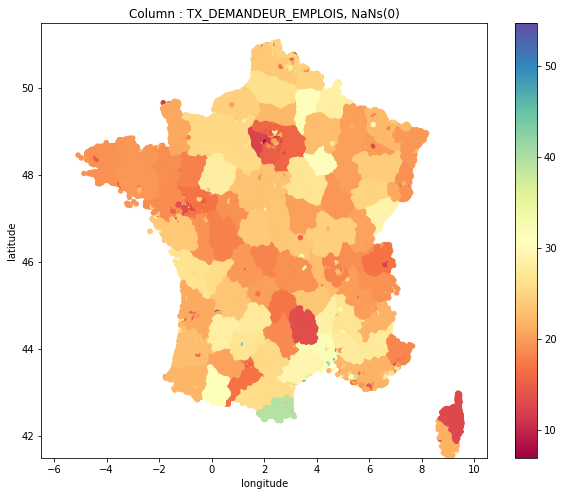

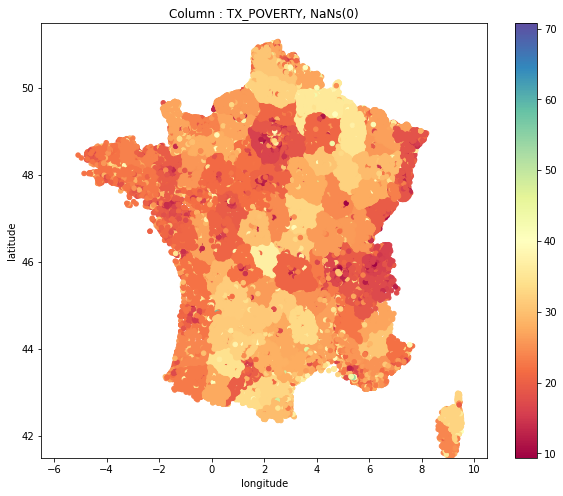

In [82]:
columns = ['TX_NSCOL15P','TX_MENSEUL','TX_FAMMONO','TX_65ETPLUS','TX_25ETMOINS','TX_DEMANDEUR_EMPLOIS','TX_POVERTY']
for c in columns:
    plot_gps_column(mergev2_gps,c)

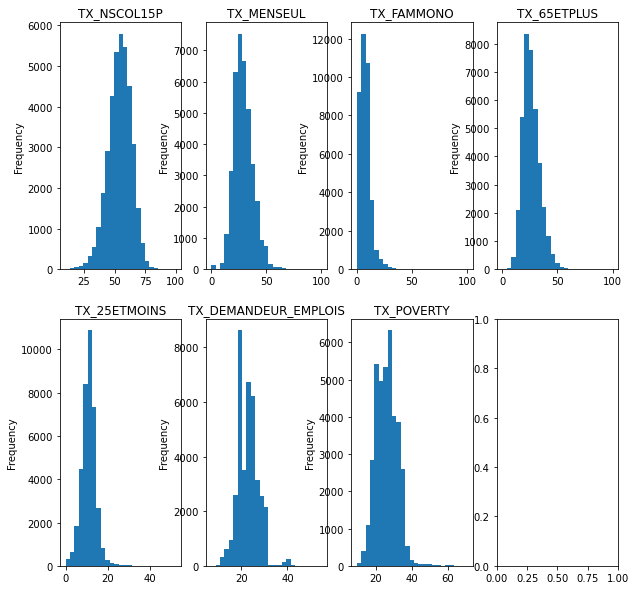

In [83]:
fig,axes = plt.subplots(2,len(columns)//2 +1,figsize=(10,10))
ax = axes.ravel()
for i,col in enumerate(columns):    
    mergev2_gps[col].plot(kind='hist',bins=25,ax=ax[i])
    ax[i].set_title(col)


## Exemple avec le département 31

In [84]:
BD = mergev2
BD['DEP'] = [str(X)[:2] for X in BD['CODE_INSEE']]
BD.head()

,Unnamed: 0,CODE_INSEE,DEP,LIBCOM,TX_NSCOL15P,TX_MENSEUL,TX_FAMMONO,TX_65ETPLUS,TX_25ETMOINS,COUVERTURE_HD_THD,TX_BENEF_MINIMAS_SOC,TX_DEMANDEUR_EMPLOIS,TX_POVERTY
0,0,01001,01,L'Abergement-Clémenciat,52.154281,22.823614,4.831504,23.779236,11.309305,1.0,1,18.909985,19.479505
1,1,01002,01,L'Abergement-de-Varey,40.425532,28.571429,4.761905,23.404255,7.978723,1.0,1,18.909985,19.479505
2,2,01004,01,Ambérieu-en-Bugey,49.474587,41.515231,10.216084,20.733915,16.620013,1.0,1,21.754928,26.170897
3,3,01005,01,Ambérieux-en-Dombes,53.574678,21.076206,6.601983,19.488442,13.854125,1.0,1,18.909985,19.479505
4,4,01006,01,Ambléon,53.061224,36.363636,9.090909,26.530612,10.204082,1.0,1,18.909985,19.479505


In [85]:
BD.loc[BD['DEP'] == '31',:]

,Unnamed: 0,CODE_INSEE,DEP,LIBCOM,TX_NSCOL15P,TX_MENSEUL,TX_FAMMONO,TX_65ETPLUS,TX_25ETMOINS,COUVERTURE_HD_THD,TX_BENEF_MINIMAS_SOC,TX_DEMANDEUR_EMPLOIS,TX_POVERTY
11277,11279,31001,31,Agassac,55.555556,30.000000,20.000000,19.191919,14.141414,1.0,1,16.908706,19.889612
11278,11280,31002,31,Aignes,40.000000,30.000000,15.000000,31.219512,10.243902,1.0,1,16.908706,19.889612
11279,11281,31003,31,Aigrefeuille,19.243809,12.432113,6.130568,6.955533,18.359717,1.0,1,16.908706,19.889612
11280,11282,31004,31,Ayguesvives,32.660253,19.191667,9.551640,15.489045,12.572846,1.0,1,16.908706,13.693271
11281,11283,31005,31,Alan,54.958678,29.629630,11.111111,33.057851,8.264463,1.0,1,16.908706,19.889612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11858,11860,31589,31,Villenouvelle,41.253508,19.626168,7.476636,18.334892,11.412535,1.0,1,16.908706,19.889612
11859,11861,31590,31,Binos,61.290323,33.333333,0.000000,16.129032,12.903226,1.0,1,16.908706,19.889612
11860,11862,31591,31,Escoulis,54.666667,44.444444,0.000000,36.000000,8.000000,1.0,1,16.908706,19.889612
11861,11863,31592,31,Larra,38.285308,13.128935,7.816819,12.999808,12.939051,1.0,1,16.908706,19.889612


In [86]:
BD_gps = pd.merge(BD.loc[BD['DEP'] == '31',:],data_gps,on='CODE_INSEE')


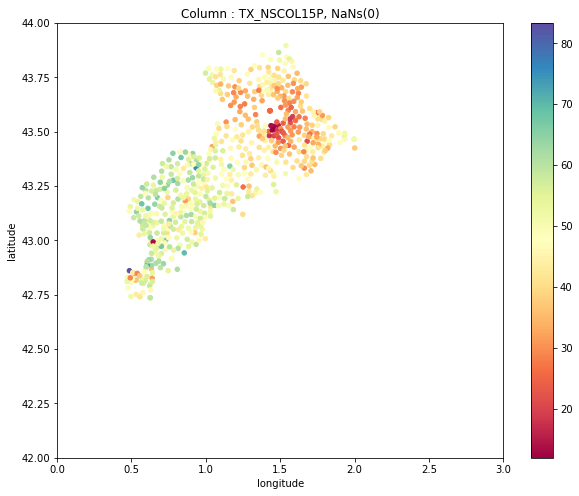

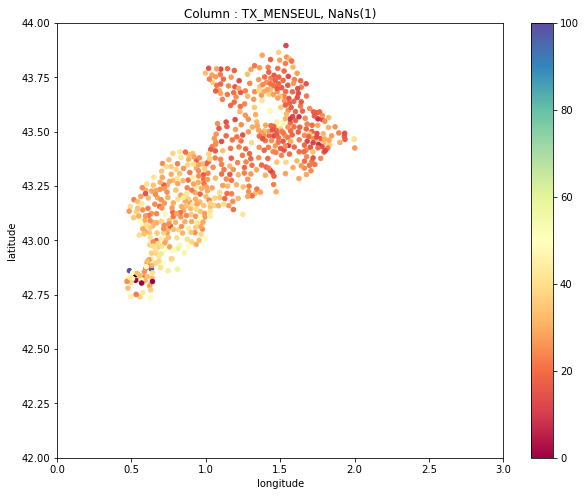

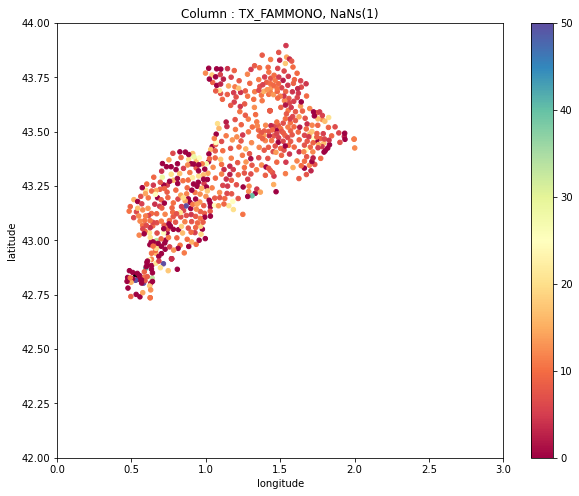

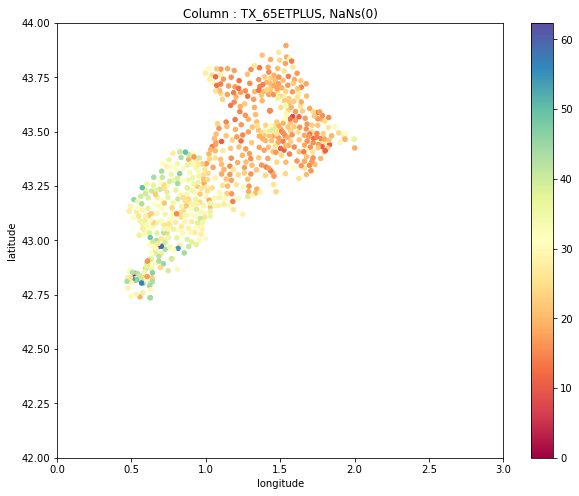

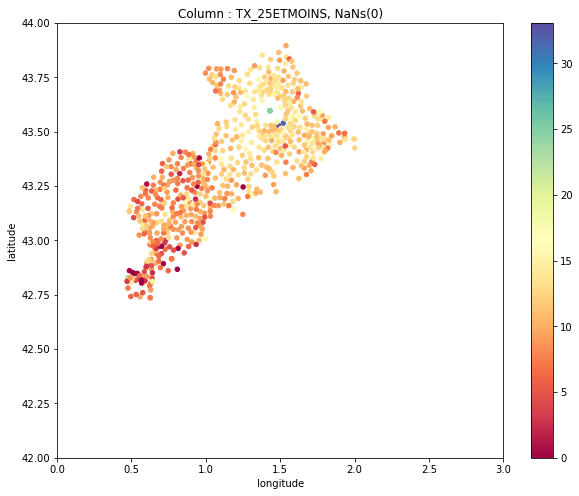

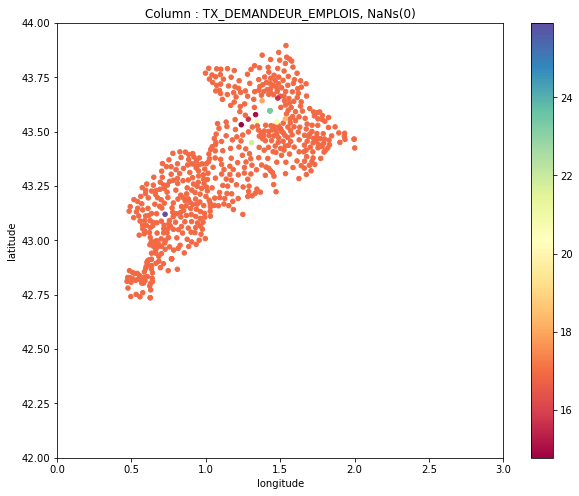

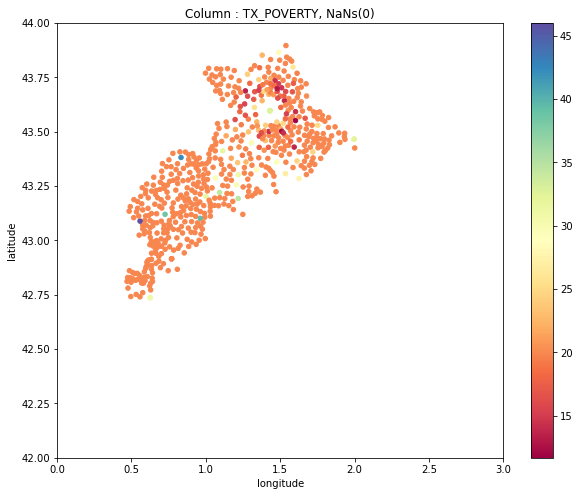

In [87]:
for i in columns:
    plot_gps_column(BD_gps,i,xlim=(0,3),ylim=(42,44))